In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
from PIL import Image

import matplotlib
matplotlib.rcParams['font.size'] = 12

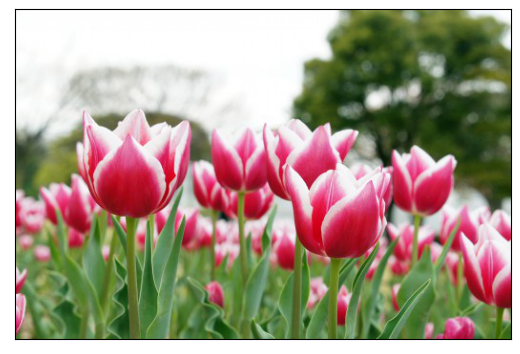

In [2]:
im = Image.open("photo.jpg")
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

In [3]:
pixels = list(im.convert('RGB').getdata())

In [4]:
# このリストから、k平均法で「代表色」を決定する
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

In [12]:
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)
    
    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:", end='')
    print(list(map(lambda x: x.tolist(), center)))
    print("========================")
    distortion = 0.0
    
    # 最大50回のIterationを実施
    for iter_num in range(50):
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0]*k
        distortion_new = 0.0
        
        # E Phase: 各データが属するグループ (代表色) を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist
        
        # M Phase: 新しい代表色を計算
        for i in range(k):
            if num_points[i] == 0:
                center_new[i] = np.array([0,0,0])
            else:
                center_new[i] = center_new[i] / num_points[i]
        center = center_new
        print(list(map(lambda x: x.tolist(), center)))
        print("Distortion: J=%d" % distortion_new)
        
        # Distortion(J)の変化が0.1未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new
    
    # 画像データの各ピクセルを代表色で置き換え
    new_pixels = []
    for pix in range(len(pixels)):
        new_pixels.append(tuple(center[cls[pix]]))
    
    print("Done.")
    return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

In [13]:
result = run_kmeans(pixels, 2)

Initial centers:[[247, 12, 245], [51, 180, 175]]
[[208.5365670295303, 78.76607325434534, 113.33376435917484], [149.38698130446048, 159.51926826940124, 129.24413292787693]]
Distortion: J=5551711805
[[193.74012667660207, 57.35301788375559, 88.36823149528068], [153.03214363084922, 163.616456347487, 134.57509884098786]]
Distortion: J=2919629150
[[121.37716152962996, 61.75262739556655, 53.699938178927844], [178.1995701715259, 182.63018531284214, 159.63909817120148]]
Distortion: J=2706036292
[[104.66888345171756, 88.78522694202226, 54.2596548713582], [219.5678482494291, 204.01079834295354, 203.00509507361463]]
Distortion: J=1530470474
[[109.10994439242513, 95.10435497124075, 60.620960807169745], [231.53685986871827, 213.41954343724254, 217.6487549496399]]
Distortion: J=963529402
[[111.81058768183453, 96.31123799684528, 63.11407724450922], [233.85761631077736, 217.78936107731678, 222.0971179259135]]
Distortion: J=905991513
[[112.79425012765337, 96.69226420599607, 64.00982930921293], [234.5162

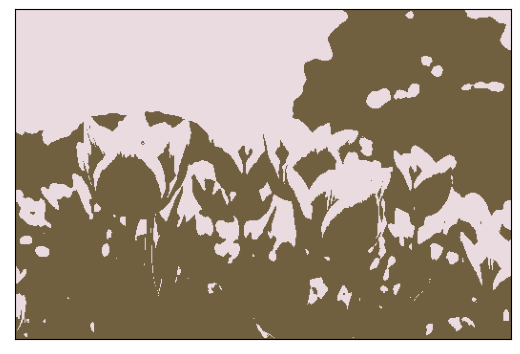

In [14]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

In [15]:
result = run_kmeans(pixels, 3)

Initial centers:[[158, 122, 61], [94, 103, 74], [98, 174, 185]]
[[181.3278827376891, 87.6324024186528, 93.0014587205609], [78.42314431805124, 101.71053085143055, 50.659097437665174], [231.2562358945614, 224.34773501688966, 224.86969156107563]]
Distortion: J=2295004835
[[182.3378827522806, 85.94663272281545, 97.27749098366452], [80.40694286769433, 105.72324274049049, 52.01453953577437], [236.5531947938993, 227.3738700959836, 229.7841611530457]]
Distortion: J=586528067
[[184.71865311125532, 84.81572812267167, 98.64592496454924], [81.50305640641511, 106.72529794946563, 52.98409598587499], [237.0629877895267, 228.2779770896274, 230.66175730110774]]
Distortion: J=578403799
[[186.2808103130755, 83.63970534069982, 99.11906691221608], [82.23939409919055, 107.21596751654494, 53.5897909141245], [237.1322366239876, 228.5463286023271, 230.85990116985838]]
Distortion: J=577279532
[[187.3177724407085, 82.39420094065846, 99.06492044431101], [82.74083550913838, 107.61160574412533, 54.06280678851175], 

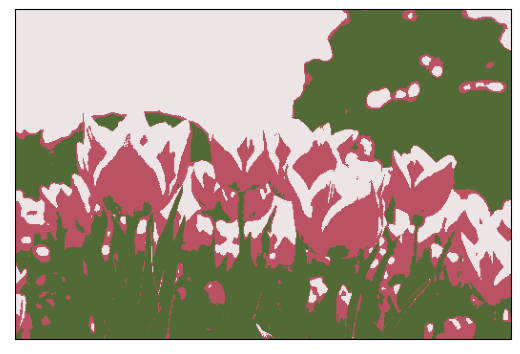

In [16]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

In [17]:
result = run_kmeans(pixels, 8)

Initial centers:[[235, 76, 194], [90, 232, 18], [81, 185, 8], [189, 80, 67], [43, 74, 45], [95, 177, 44], [175, 156, 187], [85, 245, 102]]
[[229.06024691358024, 102.04938271604938, 151.36131687242798], [0, 0, 0], [79.43137254901961, 124.07843137254902, 12.0], [182.14457831325302, 47.300658946465475, 69.85974967832495], [58.97822164948454, 83.49510309278351, 36.10301546391752], [107.06017207580048, 136.54536048791113, 74.23385428011326], [228.02322250075756, 219.25318861739345, 218.77349108839977], [129.94117647058823, 180.8235294117647, 120.29411764705883]]
Distortion: J=1191172026
[[220.7382594658057, 112.77069269151747, 148.47292339301438], [18.452770780856422, 41.72229219143577, 12.445843828715365], [84.93820313737918, 116.8263349706861, 35.74900966566313], [181.39418503057956, 33.02116299388409, 60.55125715949908], [54.41934291857028, 79.99657350174684, 33.59157484547165], [106.18161060369793, 131.09734907551794, 73.65006126085989], [238.90934848942092, 232.59023237098884, 234.3529

[[216.84032466054768, 93.46817871501176, 132.286808768869], [37.678287108371855, 62.65087313816127, 21.77195685670262], [99.91040558510639, 126.47340425531915, 65.2048204787234], [177.4918499943007, 26.56212242106463, 53.23811694973213], [69.17778707383393, 97.70534407027819, 41.132974273164606], [135.13186087839554, 151.16750444275198, 107.42228992129982], [247.01136049405474, 246.04933634436352, 246.44750668264356], [214.63053470919326, 188.25525328330207, 194.59859287054408]]
Distortion: J=144756370
[[216.84845040539517, 93.20133363643252, 132.1216185496704], [38.21693318457915, 63.21594149002107, 22.118445518780216], [101.10373638125793, 127.36127264220306, 66.47700688456653], [177.4144236813532, 26.4893993942511, 53.12577861592091], [70.45757898473553, 99.21907804655409, 41.8910188143415], [136.38916308443453, 151.92946982964497, 108.91662686408746], [247.09186788787122, 246.14795540753076, 246.54096123600704], [214.9708001871783, 188.54623303696772, 195.0149742629855]]
Distortion

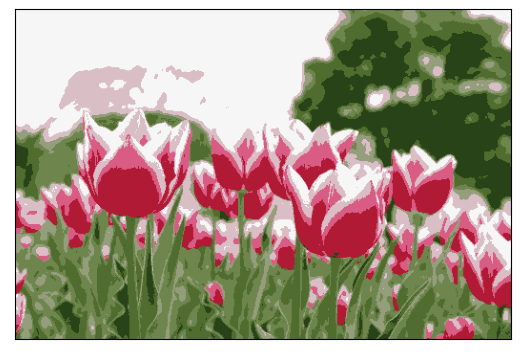

In [18]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

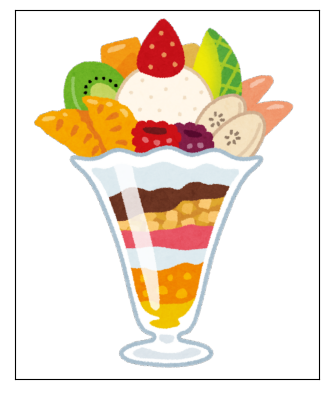

In [19]:
im = Image.open("sweets_fruit_pafe.png")
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

In [20]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:[[169, 217, 98], [146, 183, 188], [128, 74, 152], [215, 12, 221], [131, 125, 167]]
[[215.2272889346698, 170.0971567423372, 41.28180341507864], [232.83539015362774, 233.078040865994, 228.76226740353903], [16.44934983639209, 4.097131882202305, 4.562640489401053], [0, 0, 0], [172.54036827195466, 126.45396600566572, 122.01770538243626]]
Distortion: J=17193866234
[[219.87716170997905, 169.7332926791131, 28.533367733058135], [233.2167783332996, 233.27204825617878, 228.55222354917717], [106.12134217713617, 47.208837300039015, 35.16230979321108], [0.00018886870791769102, 0.0009821172811719933, 0.002949499655314608], [194.21513682307503, 84.79606650779303, 73.75645766565316]]
Distortion: J=1018183355
[[220.62658806789307, 169.87311428281038, 35.05029547137485], [232.53187647987372, 231.86777821625887, 226.60249605367008], [107.81124124682407, 65.96058746978993, 45.04430811179277], [0.0067147882670560025, 0.011821677375505811, 0.01185628968616074], [207.47650277970814, 52.7187282

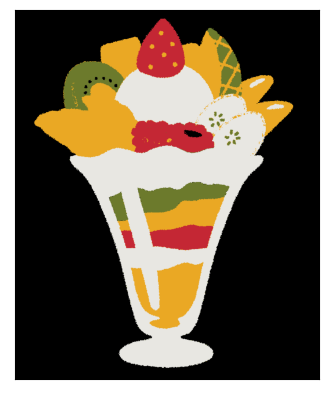

In [22]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

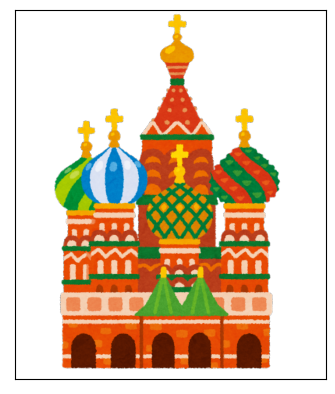

In [23]:
im = Image.open("basils_cathedral_church.png")
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)

In [24]:
pixels = list(im.convert('RGB').getdata())
result = run_kmeans(pixels, 5)

Initial centers:[[245, 242, 183], [247, 73, 221], [192, 118, 111], [108, 174, 137], [148, 140, 194]]
[[239.73342774496805, 209.91894660720743, 188.31294443774857], [0, 0, 0], [203.5359715540132, 87.4550569182638, 15.841805347424875], [3.5732372596263127, 17.795122630358684, 9.524435150247761], [106.12050359712231, 176.55935251798562, 221.8525179856115]]
Distortion: J=21706175332
[[238.89500288453613, 206.09428312409, 182.18771462322465], [0.0007320067489052724, 0.0007254416659554494, 0.003052763571667728], [208.52501977289418, 98.79963702615672, 17.455461555844302], [40.01021053963968, 86.28528332137884, 32.17868444369436], [21.308613873247875, 137.6652689589074, 195.15526536480172]]
Distortion: J=1322306764
[[238.0288414401656, 205.96590228225938, 182.46206220382373], [0.11458555103190537, 0.04258636332371466, 0.013474872997520544], [218.71121674602023, 94.17480454569771, 15.395845593011792], [48.60268096514746, 100.2794430511113, 34.74233330450575], [12.510442340121935, 134.423660656

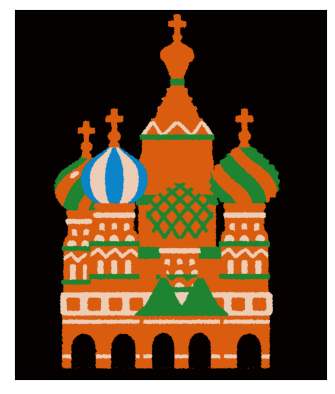

In [25]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
subplot.imshow(im)